In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob

In [254]:
runs = dict()
methods = ['joint-concat', 'l-densenet', 'pa-densenet', 'joint-dualnet','joint-hemis', 'joint-multitask','joint-multitask-vote', \
           'pa-dn201', 'l-dn201', 'joint-multitask-dn201','joint-dualnet-dn201']

for m in methods:
    print(m)
    runs[m] = []
    for i in range(5):
        f = glob.glob("/lustre04/scratch/cohenjos/PC-output/joe-s{}-{}/*val_auc.pkl".format(i, m))[0]
        print(f)
        runs[m].append(pickle.load(open(f, 'rb'))[:30])

    

joint-concat
/lustre04/scratch/cohenjos/PC-output/joe-s0-joint-concat/joint-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s1-joint-concat/joint-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s2-joint-concat/joint-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s3-joint-concat/joint-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s4-joint-concat/joint-val_auc.pkl
l-densenet
/lustre04/scratch/cohenjos/PC-output/joe-s0-l-densenet/l-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s1-l-densenet/l-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s2-l-densenet/l-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s3-l-densenet/l-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s4-l-densenet/l-val_auc.pkl
pa-densenet
/lustre04/scratch/cohenjos/PC-output/joe-s0-pa-densenet/pa-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s1-pa-densenet/pa-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s2-pa-densenet/pa-val_auc.pkl
/lustre04/scratch/cohenjos/PC-o

In [279]:
max_vals = [(np.asarray(runs[m]).mean(2).max(1).mean(),i) for i, m in enumerate(methods)]
sorted_idx = np.asarray(sorted(max_vals, reverse=True))[:,1].astype(int)

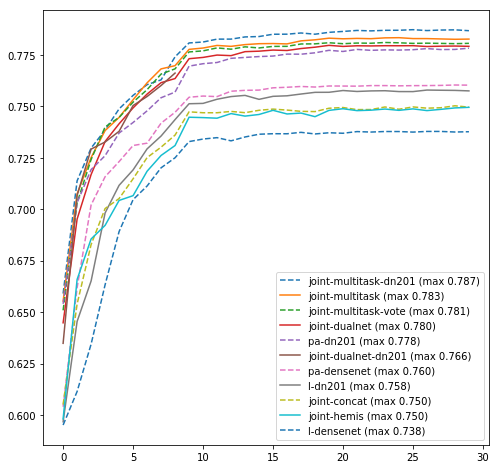

In [280]:
plt.figure(figsize=(8,8))
for i, m in enumerate(np.asarray(methods)[sorted_idx]):
    toplot = np.asarray(runs[m]).mean(0).mean(1)
    plt.plot(toplot, label="{} (max {:.3f})".format(m,toplot.max()), ls="--"if i % 2 == 0 else "-");
#plt.xlim(0,50)
plt.legend();